<a href="https://colab.research.google.com/github/danielsabino/ppgti3007_cv_2021_2/blob/main/semana02/03/codigo/%5Bnotebook%5Dcv_w02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Imagens (faces)

## Base de Dados

Base de Dados: [Labeled Faces in the Wild (LFW)](http://vis-www.cs.umass.edu/lfw/index.html). A base de dados LFW é um benchmark público para verificação de faces, também conhecido como *pair matching*. 

Vale salientar que esse conjunto de dados foi publicado para ajudar a comunidade acadêmica a desenvolver avanços na verificação facial e não fornece os requisitos para ser considerada um ponto de validação para aplicações comerciais.

A LFW contém mais de 13.000 imagens de faces coletadas na internet. Cada face está rotulada com o nome da pessoa. Para 1680 pessoas, existe duas ou mais fotos distintas no conjunto de dados.

# Regressão Logística

A regressão logística é uma técnica estatística que tem como objetivo básico realizar a predição de valores categóricos a partir de um conjunto de dados contínuos. Sem dúvida, é um modelos mais simples de serem construídos, mas que apresenta resultados satisfatórios em muitas situações.

Mais informações podem ser encontradas [aqui](https://pt.wikipedia.org/wiki/Regressão_log%C3%ADstica).

In [1]:
# importar os pacotes necessários
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import imutils
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [2]:
# adquirir um pequeno subconjunto da base Labeled Faces in the Wild 
print("[INFO] obtendo dados...")
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, funneled=True, resize=0.5)

[INFO] obtendo dados...


In [3]:
# construir  o conjunto de treinamento e teste.
(trainData, testData, trainLabels, testLabels) = train_test_split(dataset.data, dataset.target,
	test_size=0.25, random_state=42)

## Treinar o classificador

Vamos treinar um modelo de regressão logística para realizar a classificação de faces. Como não estamos interessados aqui em realizar a otimização dos hiperparâmetros do modelo, não vamos fazer uso do conjunto de validação, então, o modelo será treinado com o conjunto de treino e as medidas de desempenho serão avaliadas diretamente com a função `model.predict` no conjunto de testes.

In [5]:
# treinar o modelo e exibir o relatório de classificação
print("[INFO] treinando modelo...")
model = LogisticRegression()
model.fit(trainData, trainLabels)
print(classification_report(testLabels, model.predict(testData),
	target_names=dataset.target_names))

[INFO] treinando modelo...
                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.54      0.50        13
     Colin Powell       0.87      0.87      0.87        60
  Donald Rumsfeld       0.61      0.63      0.62        27
    George W Bush       0.91      0.88      0.90       146
Gerhard Schroeder       0.63      0.76      0.69        25
      Hugo Chavez       0.64      0.47      0.54        15
       Tony Blair       0.76      0.81      0.78        36

         accuracy                           0.80       322
        macro avg       0.70      0.71      0.70       322
     weighted avg       0.81      0.80      0.81       322



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Testando classificador manualmente

Para ter uma noção melhor do que significa o desempenho mostrada por meio do relatório anterior, vamos fazer a classificação de algumas imagens aleatórias presentes no conjunto de testes e mostrar as imagens para verificação manual.

[PREDIÇÃO] predito: George W Bush, real: George W Bush


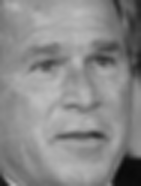

[PREDIÇÃO] predito: George W Bush, real: George W Bush


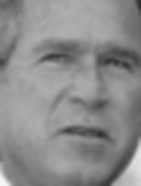

[PREDIÇÃO] predito: George W Bush, real: George W Bush


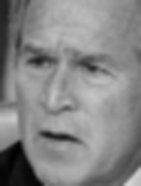

[PREDIÇÃO] predito: George W Bush, real: George W Bush


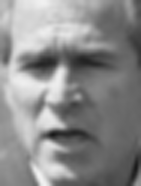

[PREDIÇÃO] predito: Tony Blair, real: Tony Blair


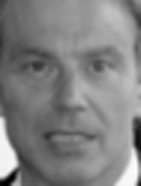

[PREDIÇÃO] predito: Colin Powell, real: Colin Powell


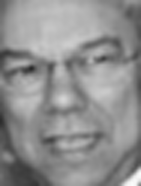

[PREDIÇÃO] predito: Colin Powell, real: Colin Powell


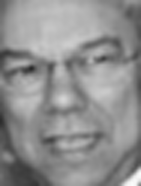

[PREDIÇÃO] predito: Tony Blair, real: George W Bush


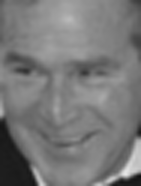

[PREDIÇÃO] predito: Hugo Chavez, real: Gerhard Schroeder


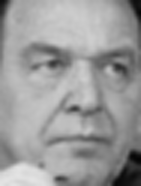

[PREDIÇÃO] predito: Donald Rumsfeld, real: Donald Rumsfeld


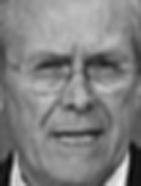

In [7]:
# loop em algumas imagens aleatórias
for i in list(map(int, np.random.randint(0, high=testLabels.shape[0], size=(10,)))):
	# pega a imagem e o nome
	image = testData[i].reshape((62, 47))
	name = dataset.target_names[testLabels[i]]

  # redimensiona para uma melhor visualização
	image = imutils.resize(image.astype("uint8"), width=image.shape[1] * 3, inter=cv2.INTER_CUBIC)
	
  # classifica a imagem utilizando o modelo treinado
	prediction = model.predict(testData[i].reshape(1, -1))[0]
	prediction = dataset.target_names[prediction]
	print("[PREDIÇÃO] predito: {}, real: {}".format(prediction, name))
	cv2_imshow(image)

# Support Vector Machine

As Máquinas de Vetores de Suporte são técnicas supervisionadas para construir modelos de classificação e regressão. As SVMs constituem uma das mais robustas técnicas para realizar predição.

A ideia básica da técnica consiste em mapear os exemplos de entrada em pontos no espaço de maneira a maximizar a distância entre as categorias. Isso é alcançado, normalmente, utilizando uma função de *kernel* para realizar o mapeamento. Mais informações sobre a técnica podem ser vistas [aqui](https://en.wikipedia.org/wiki/Support-vector_machine).

Para demonstrar a capacidade do SVM, devemos analisar quais as limitações de uma classificação linear. Vamos simular dados de uma operação XOR, que não pode ser separada somente com uma linha reta e treinar um modelo SVM com kernel linear para verificar o resultado.

A função `SVC` do pacote `sklearn.svm` faz o papel do algoritmo para treinamento do classificador SVM.

In [8]:
from sklearn.svm import SVC

# gerar os dados XOR
tl = np.random.uniform(size=(100, 2)) + np.array([-2.0, 2.0])
tr = np.random.uniform(size=(100, 2)) + np.array([2.0, 2.0])
br = np.random.uniform(size=(100, 2)) + np.array([2.0, -2.0])
bl = np.random.uniform(size=(100, 2)) + np.array([-2.0, -2.0])
X = np.vstack([tl, tr, br, bl])
y = np.hstack([[1] * len(tl), [-1] * len(tr), [1] * len(br), [-1] * len(bl)])

# construir os conjunto de treinamento e teste
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25,
	random_state=42)

## Kernel Linear

Construindo um classificador com kernel linear.

In [9]:
# treinar usando o SVM com kernel linear
print("[RESULTADOS] SVM com kernel linear")
model = SVC(kernel="linear")
model.fit(trainData, trainLabels)

# avaliar os resultados
print(classification_report(testLabels, model.predict(testData)))

[RESULTADOS] SVM com kernel linear
              precision    recall  f1-score   support

          -1       0.59      1.00      0.74        44
           1       1.00      0.45      0.62        56

    accuracy                           0.69       100
   macro avg       0.79      0.72      0.68       100
weighted avg       0.82      0.69      0.67       100



## Kernel Polinomial

Foi possível notar que, mesmo em um problema simples, mas que possui uma separação não-linear, o SVM com kernel linear não conseguiu encontrar o hiperplano de separação ideal e realizar a classificação corretamente.

Vamos então, trabalhar com um kernel não-linar, como o polinomial, cuja transformação nos dados pode permitir que o hiperplano de separação seja suficiente para dividir os dados corretamente.

In [10]:
# treinar SVM usando kernel polinomial
print("[RESULTADOS] SVM com kernel polinomial.")
model = SVC(kernel="poly", degree=2, coef0=1)
model.fit(trainData, trainLabels)

# exibindo os resultados
print(classification_report(testLabels, model.predict(testData)))

[RESULTADOS] SVM com kernel polinomial.
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Nota-se pelos resultados, portanto, que uma transformação polinomial foi suficiente para levar os dados para um novo espaço de características, cuja separação pode ser feita por um hiperplano.

Vamos mostrar agora o SVM no mesmo problema anterior de classificação de faces.

In [11]:
# adquirir um pequeno subconjunto da base Labeled Faces in the Wild 
print("[INFO] obtendo dados...")
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, funneled=True, resize=0.5)

[INFO] obtendo dados...


In [12]:
# construir  o conjunto de treinamento e teste.
(trainData, testData, trainLabels, testLabels) = train_test_split(dataset.data, dataset.target,
	test_size=0.25, random_state=42)

In [15]:
print("[INFO] treinando modelo...")
model = SVC(kernel="poly")
model.fit(trainData, trainLabels)
print(classification_report(testLabels, model.predict(testData),
	target_names=dataset.target_names))

[INFO] treinando modelo...
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.69      0.60        13
     Colin Powell       0.82      0.83      0.83        60
  Donald Rumsfeld       0.69      0.74      0.71        27
    George W Bush       0.92      0.90      0.91       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.85      0.73      0.79        15
       Tony Blair       0.85      0.78      0.81        36

         accuracy                           0.84       322
        macro avg       0.77      0.78      0.77       322
     weighted avg       0.84      0.84      0.84       322



[PREDIÇÃO] predito: Colin Powell, real: Colin Powell


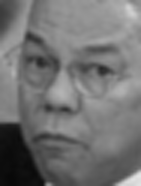

[PREDIÇÃO] predito: Tony Blair, real: Colin Powell


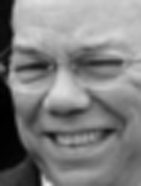

[PREDIÇÃO] predito: Tony Blair, real: Tony Blair


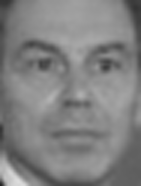

[PREDIÇÃO] predito: George W Bush, real: George W Bush


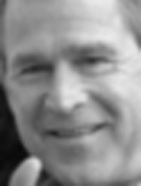

[PREDIÇÃO] predito: Colin Powell, real: Colin Powell


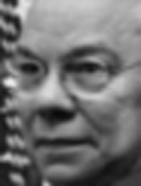

[PREDIÇÃO] predito: Tony Blair, real: Tony Blair


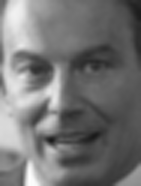

[PREDIÇÃO] predito: George W Bush, real: George W Bush


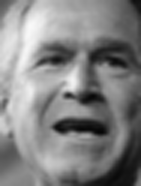

[PREDIÇÃO] predito: Gerhard Schroeder, real: George W Bush


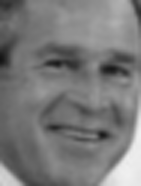

[PREDIÇÃO] predito: Tony Blair, real: Tony Blair


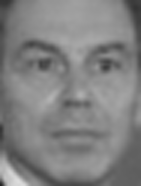

[PREDIÇÃO] predito: Hugo Chavez, real: Hugo Chavez


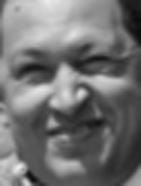

In [16]:
# loop em algumas imagens aleatórias
for i in list(map(int, np.random.randint(0, high=testLabels.shape[0], size=(10,)))):
	# pega a imagem e o nome
	image = testData[i].reshape((62, 47))
	name = dataset.target_names[testLabels[i]]

  # redimensiona para uma melhor visualização
	image = imutils.resize(image.astype("uint8"), width=image.shape[1] * 3, inter=cv2.INTER_CUBIC)
	
  # classifica a imagem utilizando o modelo treinado
	prediction = model.predict(testData[i].reshape(1, -1))[0]
	prediction = dataset.target_names[prediction]
	print("[PREDIÇÃO] predito: {}, real: {}".format(prediction, name))
	cv2_imshow(image)

# Classificação de Imagens (cenários)

Para diversificar os exemplos de classificação de imagens, vamos partir para o problema de categorização de cenários. Nesse caso, queremos distinguir entre tipos de locais diferentes onde imagens foram capturadas. Por exemplo, queremos organizar fotos entre imagens tiradas na natureza ou em ambientes urbanos.

Vamos também trabalhar com outros classificadores: as árvores de decisão.

# Árvores de Decisão

As árvores de decisão são ferramentas para construir modelos que ajudam na tomada de decisão e possibilitam quantificar a chance de um determinado evento ocorrer. 

Uma árvore de decisão é um estrutura na qual os nós internos representam *testes* nos atributos das instâncias de uma base de dados, cada ramificação representa o resultado desse teste e cada folha representa um rótulo de classe. Uma característica marcante dessa técnica é a possibilidade de extrair regras de classificação. Para isso, basta percorrer o caminho da raiz até uma das folhas verificando os testes feitos. Uma explicação mais detalhada das árvores de decisão podem ser encontadas [aqui](https://en.wikipedia.org/wiki/Decision_tree).

Vamos desmonstar um novo exemplo de classificação de imagens, onde o nosso objetivo é distinguir entre diferentes cenários.

Nesse caso, para uma classificação mais robusta, não vamos utilizar as imagens diretamente, mas sim extrair características delas para utilizar como features de entrada para o classificador.

O pacote `mahotas` traz alguns desses extratores de features. Aqui, para fins de exemplificação, vamos utilizar o *haralick* (`mahotas.features.haralick`).

O primeiro passo, então, é instalar o pacote no ambiente do Colab.


In [17]:
!pip install numpy --upgrade
!pip install mahotas


     |████████████████████████████████| 15.7 MB 4.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 5.7 MB 4.2 MB/s 


Após isso, vamos importar os pacotes e construir uma função para extrair as features das imagens. A construção da função não é algo obrigatório, mas vai facilitar nossa vida na hora de escrever o restante do código.

In [17]:
from sklearn.tree import DecisionTreeClassifier
import mahotas
#import mahotas.features
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from sklearn.metrics import classification_report
from sklearn import datasets

import imutils

import sklearn
from sklearn.model_selection import train_test_split


# função que extrai as características da imagem
def describe(image):
	# extrai a média e desvio padrão de cada canal do espaço HSV.
	(means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
	colorStats = np.concatenate([means, stds]).flatten()
  # extrai Haralick texture features
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	haralick = mahotas.features.haralick(gray).mean(axis=0)
  # retorna um vetor formado por estatísticas básicas e das Haralick texture features
	return np.hstack([colorStats, haralick])

## Construindo Conjunto de Dados

Vamos construir nosso dadataset a partir do conjunto de dados 4scenes. Esse conjunto de dados possui imagens de quatro tipos de cenários: 
- coasts (praia), 
- forests (florestas), 
- highways (estradas) e 
- streets (ruas urbanas).

A ideia aqui é construir um classificador que possa distinguir entre esses quatro tipos de cenário tendo uma imagem como entrada.

Note que vamos estruturar uma base de dados a partir da extração de características de cada imagem do conjunto de dados original. Para cada imagem, haverá um vetor com as características extraídas a partir do extrator *haralick*.

In [5]:
# baixando o conjunto de dados
!rm *.zip.*
#!wget 'https://github.com/danielsabino/ppgti3007_cv_2021_2/raw/main/semana02/03/codigo/4scenes.zip'
!wget 'https://github.com/danielsabino/ppgti3007_cv_2021_2/raw/semana02/semana02/aula03/4scenes.zip'
!ls -l

rm: cannot remove '*.zip.*': No such file or directory
--2022-02-12 00:58:28--  https://github.com/danielsabino/ppgti3007_cv_2021_2/raw/semana02/semana02/aula03/4scenes.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/semana02/semana02/aula03/4scenes.zip [following]
--2022-02-12 00:58:28--  https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/semana02/semana02/aula03/4scenes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54187202 (52M) [application/zip]
Saving to: ‘4scenes.zip’

4scenes.zip         100%[===================>]  51.68M   170MB/

In [6]:
# descompactando o conjunto de dados
!unzip '/content/4scenes.zip'

Archive:  /content/4scenes.zip
   creating: 4scenes/
  inflating: 4scenes/highway_gre141.jpg  
  inflating: 4scenes/highway_bost389.jpg  
  inflating: 4scenes/highway_gre155.jpg  
  inflating: 4scenes/coast_natu641.jpg  
  inflating: 4scenes/forest_land314.jpg  
  inflating: 4scenes/street_street61.jpg  
  inflating: 4scenes/forest_nat449.jpg  
  inflating: 4scenes/forest_cdmc451.jpg  
  inflating: 4scenes/street_hexp29.jpg  
  inflating: 4scenes/highway_bost148.jpg  
  inflating: 4scenes/forest_land102.jpg  
  inflating: 4scenes/highway_bost160.jpg  
  inflating: 4scenes/highway_bost174.jpg  
  inflating: 4scenes/coast_n203030.jpg  
  inflating: 4scenes/street_bost50.jpg  
  inflating: 4scenes/forest_nat717.jpg  
  inflating: 4scenes/forest_cdmc280.jpg  
  inflating: 4scenes/street_bost137.jpg  
  inflating: 4scenes/highway_urb710.jpg  
  inflating: 4scenes/forest_natu308.jpg  
  inflating: 4scenes/coast_land113.jpg  
  inflating: 4scenes/coast_natu912.jpg  
  inflating: 4scenes/stree

In [11]:
# construindo a base de dados a partir das features extraídas do conjunto 4scenes

imagesPath = './4scenes'
labels = []
data = []

files = os.listdir(imagesPath)

print("[INFO] extraindo features...")

# loop em todas as imagens do diretório
for image_name in files:
  # extraindo o rótulo das imagens (primeira parte do nome do arquivo)
  label = image_name[image_name.rfind("/") + 1:].split("_")[0]
  # carregando a imagem
  image = cv2.imread(imagesPath+'/'+image_name)  
  # extraindo as features da imagem
  features = describe(image)
  # adicionando o rótulo da imagem (classe) em uma lista de rótulos
  labels.append(label)
  # adicionando a imagem (features) ao conjunto de dados
  data.append(features)

[INFO] extraindo features...


Vamos analisar os metadados. Ou seja, como era o conjunto de dados original e como está disposto a base de dados criada a partir da extração de caraterísticas das imagens.

Tamanho da imagem: (256, 256, 3)


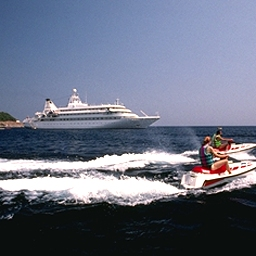

In [14]:
sample_image = cv2.imread('4scenes/coast_arnat59.jpg')
print(f'Tamanho da imagem: {sample_image.shape}')
cv2_imshow(sample_image)

In [15]:
sample_data = data[0]
print(f'Tamanho da entrada na BD: {sample_data.shape}')
print(sample_data)

Tamanho da entrada na BD: (19,)
[ 7.67884064e+01  4.09256134e+01  1.36049622e+02  2.87110052e+01
  2.74702682e+01  7.30156021e+01  8.60155415e-04  7.35527232e+02
  9.29753371e-01  5.23497217e+03  2.38247177e-01  2.59825769e+02
  2.02043614e+04  8.65316081e+00  1.29118319e+01  2.34403640e-04
  5.01016833e+00 -3.21761569e-01  9.96077930e-01]


## Dividir a base de dados

Como de praxe, vamos dividir a base de dados com um *holdout* de 75/25 para treinamento e teste.

In [19]:
# construir as bases de treinamento e teste
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25, random_state=42)

## Treinar modelo

Vamos construir um modelo baseado em árvore de decisão para classificar as imagens. Não vamos otimizar o classificador e a configuração utilizada é a padrão.

In [20]:
# iniciar o modelo como árvore de decisão
model = DecisionTreeClassifier(random_state=84)
# treinar o modelo
print("[INFO] treinando modelo...")
model.fit(trainData, trainLabels)

[INFO] treinando modelo...


DecisionTreeClassifier(random_state=84)

## Avaliar modelo

Por fim, vamos avaliar como foi o treinamento do simples modelo criado para classificar as imagens de cenários em um conjunto de imagens nunca vista por esse modelo (conjunto de teste). Para isso, os resultados de precisão, revocação e *f-measure* vão ser exibidos.

In [21]:
print("[INFO] avaliando...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.72      0.72      0.72        88
      forest       0.96      0.88      0.92        85
     highway       0.69      0.70      0.70        74
      street       0.63      0.70      0.66        63

    accuracy                           0.75       310
   macro avg       0.75      0.75      0.75       310
weighted avg       0.76      0.75      0.76       310



## Testando manualmente o modelo

Para entender melhor o que esses resultados significam na prática, vamos visualizar algumas das predições feitas por ele.

In [23]:
imagesPath = './4scenes'
labels = []
data = []

files = os.listdir(imagesPath)

print("[INFO] extraindo features...")

# loop em todas as imagens do diretório
for image_name in files:
  # extraindo o rótulo das imagens (primeira parte do nome do arquivo)
  label = image_name[image_name.rfind("/") + 1:].split("_")[0]
  # carregando a imagem
  image = cv2.imread(imagesPath+'/'+image_name)  
  # extraindo as features da imagem
  features = describe(image)
  # adicionando o rótulo da imagem (classe) em uma lista de rótulos
  labels.append(label)
  # adicionando a imagem (features) ao conjunto de dados
  data.append(features)

[INFO] extraindo features...


[PREDIÇÃO] street_par81.jpg: street


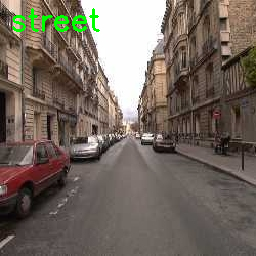

[PREDIÇÃO] highway_gre485.jpg: highway


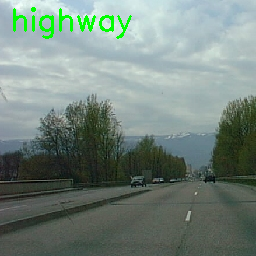

[PREDIÇÃO] highway_gre657.jpg: coast


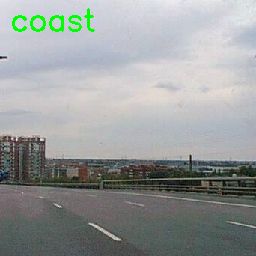

[PREDIÇÃO] coast_nat897.jpg: coast


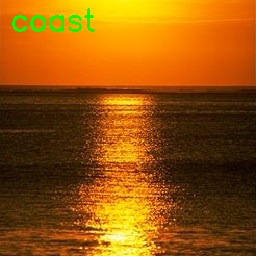

[PREDIÇÃO] forest_for151.jpg: forest


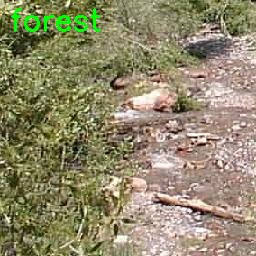

[PREDIÇÃO] highway_gre40.jpg: coast


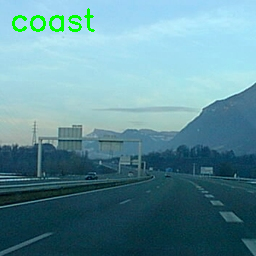

[PREDIÇÃO] highway_bost301.jpg: highway


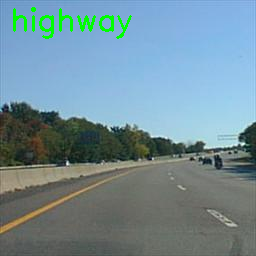

[PREDIÇÃO] street_urb722.jpg: street


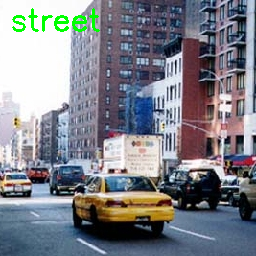

[PREDIÇÃO] coast_n328001.jpg: coast


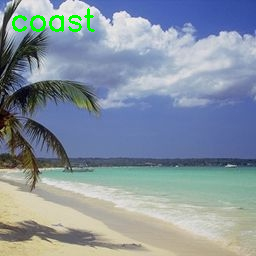

[PREDIÇÃO] street_gre86.jpg: street


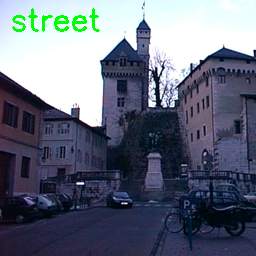

In [25]:
# loop em algumas imagens aleatórias
for i in np.random.randint(0, high=len(files), size=(10,)):
	# pega a imagem e classifica
	imagePath = imagesPath + '/' + files[i]
	filename = files[i]
	image = cv2.imread(imagePath)
	features = describe(image)
	prediction = model.predict(features.reshape(1, -1))[0]
	# mostra a predição
	print("[PREDIÇÃO] {}: {}".format(filename, prediction))
	cv2.putText(image, prediction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
	cv2_imshow(image)

# Random Forests

Existem versões mais recentes que trabalham com comitês de árvores de decisão. Isso significa que são construídas várias árvores e a decisão final não é dada somente por um classificador, mas pela combinação dos resultados de vários deles. Nesse caso, várias árvores de decisão. Esse modelo é conhecido como *Random Forests*. Para mais detalhes, consulte https://en.wikipedia.org/wiki/Random_forest.

A função que vamos utilizar para construir esse modelo também faz parte do `sklearn` e é chamada de `RandomForestClassifier`. 

In [26]:
# construir as bases de treinamento e teste
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

# iniciar o modelo como árvore de decisão
model = RandomForestClassifier(random_state=84)
# treinar o modelo
print("[INFO] treinando modelo...")
model.fit(trainData, trainLabels)

[INFO] treinando modelo...


RandomForestClassifier(random_state=84)

In [28]:
print("[INFO] avaliando...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.80      0.89      0.84        88
      forest       0.98      0.96      0.97        85
     highway       0.91      0.69      0.78        74
      street       0.75      0.87      0.81        63

    accuracy                           0.86       310
   macro avg       0.86      0.85      0.85       310
weighted avg       0.87      0.86      0.86       310



Note que o desempenho já foi consideravelmente superior ao de uma árvore de decisão simples.